In [3]:
!pip install -r requirements.txt

     |████████████████████████████████| 1.4 MB 19.3 MB/s eta 0:00:01
     |████████████████████████████████| 723 kB 98.0 MB/s eta 0:00:01
     |████████████████████████████████| 12.8 MB 18.3 MB/s eta 0:00:01
     |████████████████████████████████| 241 kB 113.6 MB/s eta 0:00:01
     |████████████████████████████████| 74 kB 81.0 MB/s  eta 0:00:01
     |████████████████████████████████| 456 kB 103.0 MB/s eta 0:00:01
     |████████████████████████████████| 9.2 MB 27.0 MB/s eta 0:00:01
     |████████████████████████████████| 126 kB 116.7 MB/s eta 0:00:01
     |████████████████████████████████| 9.8 MB 102.1 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 95.1 MB/s eta 0:00:01
     |████████████████████████████████| 113 kB 114.5 MB/s eta 0:00:01
  Created wheel for markovify: filename=markovify-0.9.0-py3-none-any.whl size=18474 sha256=fc4a2de91b8c283913f101ca726291045193476ea062f0dca00e62784373504f
  Stored in directory: /tmp/pip-ephem-wheel-cache-wmgl7xsa/wheels/32/20/e1/5307

In [4]:
import pandas as pd

df = pd.read_csv('response.csv') 
df = df.fillna('')
df['response']=df.iloc[:,3]+df.iloc[:,5]+df.iloc[:,6]
df['issue'] = df.iloc[:,1]
df['symptom'] = df.iloc[:,2] + df.iloc[:,4]
subset = df.iloc[:,-3:]
subset

,response,issue,symptom
0,my brakes make a noise whenever I try to stop,Brakes,Car makes grinding noise
1,super frustrating every time I start my car it...,Starter,Car starts then stops
2,I can't open the damn door to my car,Other,
3,I turn the key and nothing happens,Starter,Car doesn't start
4,Car doesn't always start when it's low on blin...,Starter,Car doesn't start
...,...,...,...
104,my breaks are faulty.,Brakes,"Car brakes, but then brakes disengage"
105,my lights do not work,Other,
106,I try to start the engine only to find that th...,Starter,Car doesn't start
107,The driver side window auto function does not ...,Other,


In [5]:
import markovify
import codecs

In [6]:
def train_markov_type(data, issue):
    return markovify.Text(data[data["issue"] == issue].response, retain_original=False, state_size=2)

def make_sentence(model, length=200):
    return model.make_short_sentence(length, max_overlap_ratio = .7, max_overlap_total=15)

other_model = train_markov_type(subset, "Other")
brakes_model = train_markov_type(subset, "Brakes")
starter_model = train_markov_type(subset, "Starter")

In [7]:
make_sentence(other_model)

'There is a light that came on that looks to be something related to the left.'

In [9]:
make_sentence(brakes_model)

'Car makes a squeeky noise when I hit brakes.'

In [8]:
make_sentence(starter_model)

'Car dies when I step on the the fourth time.'

We can combine these models with relative weights

In [9]:
compound_model = markovify.combine([other_model, brakes_model, starter_model], [14, 7, 7])

In [10]:
for i in range(20):
    print(make_sentence(compound_model))

I can't open the damn door to my previous display which is very unsafe.
My back seat seatbelt won't lock.
The car pulls to the brake pedal
This is the third one, and I can't open the damn door to my car starts.
Blind Spot Monitoring system will randomly be disabled.
My battery keeps dying.
My window won't roll up.
My car is now a pile of ashes.
I feel like the car evaluated.
the flux capacitor is misfiring and I can't open the damn door to my previous display which is very unsafe.
It seems like I have some noise when i drive it above 60 mph
I don't know what more you want from me, I get into the car, it spits and sputters for a few seconds and then won't start the engine unless you hit the start button to turn over.
I tried starting my car if the door won't open, and I'm all out of park.
windshield wipers
I'm having an issue with fuel injection sensor or pressure.
Front right corner is dented from a collision.
The car won't turn off either.
That's all good.
It is very slow to get movin

In [11]:
import numpy
def generate_cases(models, weights=None):
    if weights is None:
        weights = [1] * len(models)
    
    choices = []
    
    total_weight = float(sum(weights))
    
    for i in range(len(weights)):
        choices.append((float(sum(weights[0:i+1])) / total_weight, models[i]))
    
    def choose_model():
        r = numpy.random.uniform()
        for (p, m) in choices:
            if r <= p:
                return m
        return choices[-1][1]


    def choose_from(c):
        idx = math.floor(numpy.random.uniform() * len(c))
        return c[idx]
    
    
    while True:
        yield (make_sentence(choose_model()))
            

In [12]:
t = generate_cases([other_model, brakes_model, starter_model], [3,4,4])

In [13]:
[next(t) for i in range(100)]

['It seems like I have to stretch my leg to do it.',
 'Sometimes the car would not start.',
 'The car pulls to the left.',
 'The paint on the fuel line, and apparently it came loose while driving.',
 'The other 3 tires report normally.',
 "It's not actually a grinding noise, more like a piercing shriek of anguish",
 'Fuel economy has gotten very bad.',
 'My cars breaks make a noise whenever I try to stop',
 'Then I have to brake again.',
 'When I turn the key and hear funny sounds but nothing happens.',
 'Car makes a squeeky noise when I push hard on the brake pedal.',
 'Plus it seems it takes a long time to come to a complete stop.',
 'My car is behaving very weird.',
 'With that, highway driving is very unpleasant.',
 'The pedal feels squishy.',
 'To much technology, and that is ieven getting worse from model to newer model.',
 'The car pulls to the left.',
 'Car makes a squeeky noise when I press the brakes disengage.',
 'Sometimes when I brake, after a few seconds, the brakes disen

Checking for similarity (slow)

In [ ]:
#https://stackoverflow.com/questions/54334304/spacy-cant-find-model-en-core-web-sm-on-windows-10-and-python-3-5-3-anacon
#in your terminal window, execute the following code, before loading 'en_core_web_sm':
#     cd vehicle-claims-processing/
#     python -m spacy download en_core_web_sm


/opt/app-root/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  app.launch_new_instance()
/opt/app-root/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always

Mean similarity: 0.8247100674653405


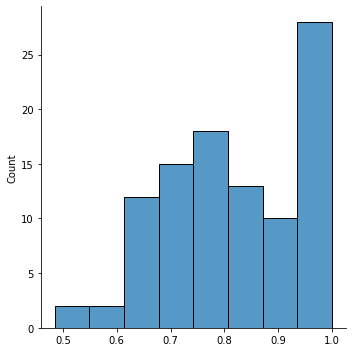

In [15]:
import spacy

nlp = spacy.load('en_core_web_sm')
#nlp = spacy.load('en')

dt_b = subset["response"]
dt_a = [next(t) for i in range(100)]

import numpy as np
a = []
for sentence in dt_a:
    doc = nlp(sentence)
    m = 0
    for sentence1 in dt_b:
        doc1 = nlp(sentence1)
        if m < doc.similarity(doc1):
            m = doc.similarity(doc1)
    a.append(m)
        
print("Mean similarity: " + str(np.array(a).mean()))

import seaborn as sns
sns.displot(a)

In [22]:
import cProfile

def timing(c):
    for _ in range(c):
        next(t)

cProfile.run('timing(2000)', 'generatestats')

In [23]:
import pstats
p = pstats.Stats('generatestats')
p.strip_dirs().sort_stats(-1).print_stats()

Thu Mar 18 16:13:34 2021    generatestats

         294793 function calls (270390 primitive calls) in 0.136 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
     2000    0.001    0.000    0.008    0.000 <ipython-input-13-5f1382f3447f>:13(choose_model)
     2000    0.001    0.000    0.135    0.000 <ipython-input-13-5f1382f3447f>:2(generate_cases)
        1    0.001    0.001    0.136    0.136 <ipython-input-22-801ca619797e>:3(timing)
     2000    0.002    0.000    0.126    0.000 <ipython-input-7-3e3ab942a540>:4(make_sentence)
        1    0.000    0.000    0.136    0.136 <string>:1(<module>)
    62107    0.016    0.000    0.023    0.000 chain.py:10(accumulate)
    26438    0.017    0.000    0.106    0.000 chain.py:112(gen)
     2035    0.005    0.000    0.111    0.000 chain.py:125(walk)
    26438    0.055    0.000    0.089    0.000 chain.py:96(move)
     2035    0.001    0.000    0.002    0.000 text.py:120(word_join)
     2035